In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('spam.csv',encoding='latin-1')

In [91]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [92]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [94]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [95]:
data.sample(5)

,v1,v2
143,ham,I know you are. Can you pls open the back?
4826,ham,Yup but it's not giving me problems now so may...
650,ham,Thats cool! Sometimes slow and gentle. Sonetim...
2169,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
1000,ham,No..but heard abt tat..


In [96]:
encoder=LabelEncoder()

In [97]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [98]:
data.sample()

,target,text
1189,ham,In that case I guess I'll see you at campus lodge


In [99]:
data['target']=encoder.fit_transform(data['target'])

In [100]:
data.sample(5)

,target,text
101,0,I'm still looking for a car to buy. And have n...
1195,1,You have 1 new voicemail. Please call 08719181503
2285,0,"Hi, wkend ok but journey terrible. Wk not good..."
4396,0,When did dad get back.
5472,0,Well obviously not because all the people in m...


In [101]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [102]:
data.duplicated().sum()

403

In [103]:
data=data.drop_duplicates()

In [104]:
data.shape

(5169, 2)

**Exploratory Data Analysis**

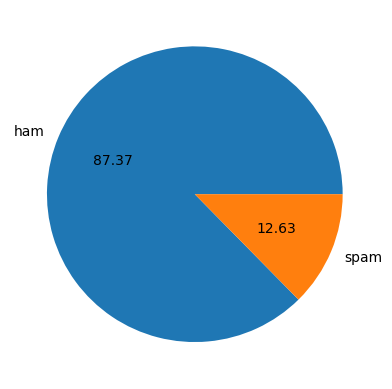

In [105]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [106]:
import nltk

In [107]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rgukt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
data['num_characters']=data['text'].apply(len)

In [109]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [110]:
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [111]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [112]:
data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [113]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [114]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


This is for HAM messages

In [118]:
data.shape

(5169, 5)

In [116]:
len(data[data['target']==0])

4516

In [120]:
len(data[data['target']==1])

653

In [135]:
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


This is for spam messages

In [136]:
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


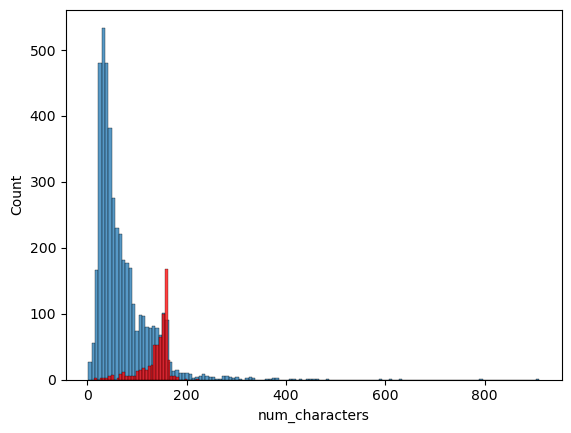

In [137]:
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')
plt.show()

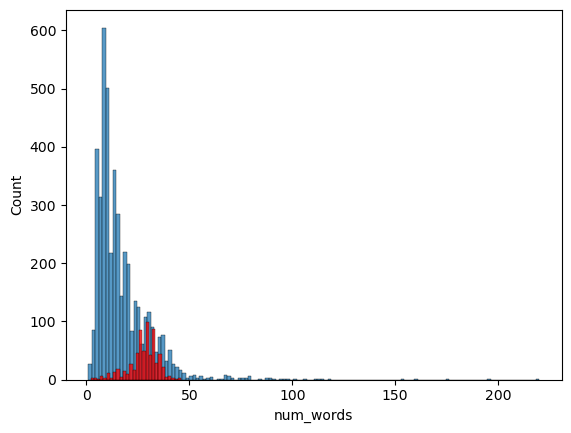

In [138]:
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')
plt.show()

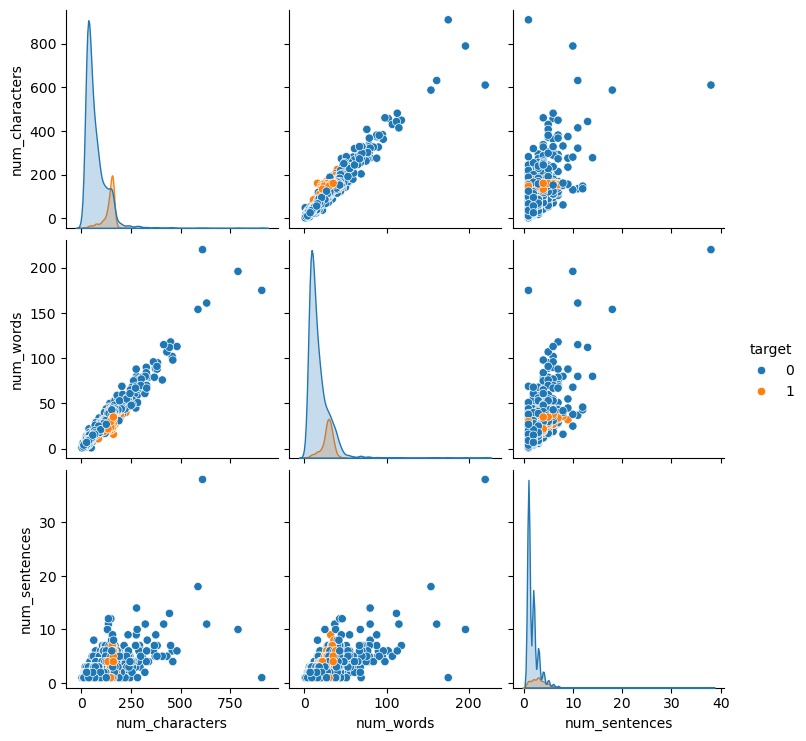

In [139]:
sns.pairplot(data,hue='target')

**Data Transformation**

In [140]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [141]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [142]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [143]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [144]:
transform_text('Hi hello How are you ? "sravanthi" Are you st ! ill Dancing ?')

"hi hello `` sravanthi '' st ill danc"

In [145]:
data['transform_text']=data['text'].apply(transform_text)

In [146]:
data.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [147]:
!pip install wordcloud

In [148]:
from wordcloud import WordCloud

In [149]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [150]:
spam_wc=wc.generate(data[data['target']==1]['transform_text'].str.cat(sep=""))

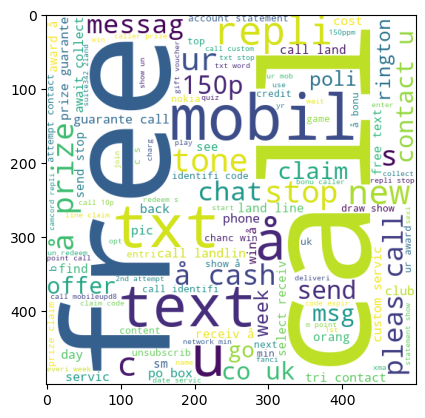

In [151]:
plt.imshow(spam_wc)

In [152]:
ham_wc=wc.generate(data[data['target']==0]['transform_text'].str.cat(sep=""))

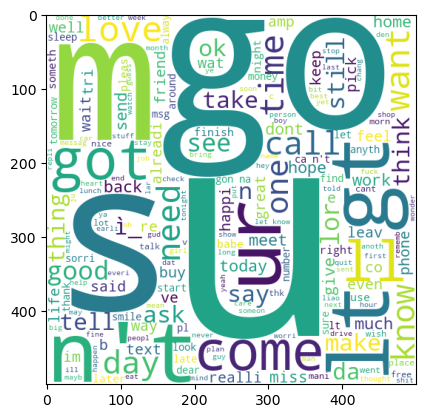

In [153]:
plt.imshow(ham_wc)

Top 30 words in ham and spam used

In [154]:
spam_corpus=[]
for msg in data[data['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [155]:
len(spam_corpus)

11083

In [156]:
from collections import Counter

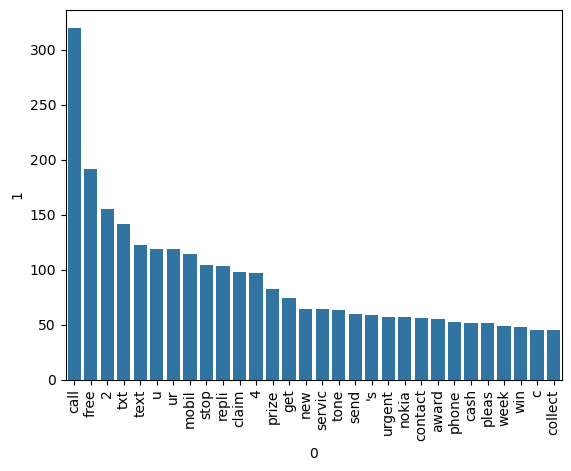

In [157]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [158]:
ham_corpus=[]
for msg in data[data['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [159]:
len(ham_corpus)

39894

In [160]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,...,1073
1,u,883
2,..,524
3,'s,413
4,go,404
5,'m,371
6,get,349
7,n't,338
8,gt,288
9,lt,287


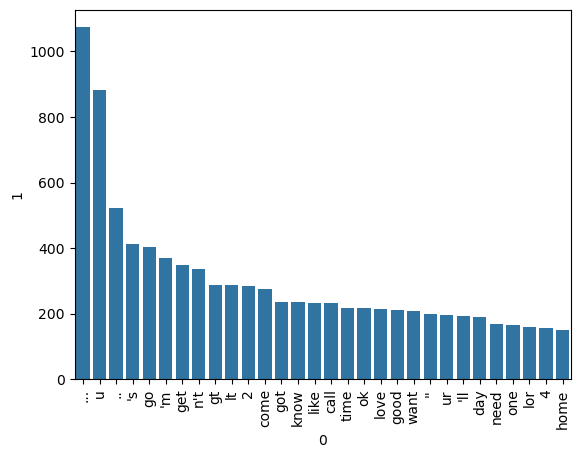

In [161]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [162]:
from sklearn.feature_extraction.text import CountVectorizer

In [163]:
cv=CountVectorizer()

In [164]:
x=cv.fit_transform(data['transform_text']).toarray()

In [165]:
x.shape

(5169, 7377)

In [166]:
y=data['target']

In [167]:
y.shape

(5169,)

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [169]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [170]:
gnb=GaussianNB()
mnb=MultinomialNB(alpha=0.5)
bnb=BernoulliNB(alpha=0.5)

In [171]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred1))
print('confusion_matrix',confusion_matrix(y_test,y_pred1))
print('precision_score',precision_score(y_test,y_pred1))

accuracy_score 0.8781431334622823
confusion_matrix [[781 108]
 [ 18 127]]
precision_score 0.5404255319148936


In [172]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred2))
print('confusion_matrix',confusion_matrix(y_test,y_pred2))
print('precision_score',precision_score(y_test,y_pred2))

accuracy_score 0.9748549323017408
confusion_matrix [[871  18]
 [  8 137]]
precision_score 0.8838709677419355


In [173]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred3))
print('confusion_matrix',confusion_matrix(y_test,y_pred3))
print('precision_score',precision_score(y_test,y_pred3))

accuracy_score 0.9777562862669246
confusion_matrix [[883   6]
 [ 17 128]]
precision_score 0.9552238805970149


In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [195]:
tfidf=TfidfVectorizer(max_features=5000)

In [196]:
data.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [197]:
x1=tfidf.fit_transform(data['transform_text']).toarray()

In [198]:
y1=data['target']

In [199]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [200]:
gnb.fit(x1_train,y1_train)
y_pred1=gnb.predict(x1_test)
print('accuracy_score',accuracy_score(y1_test,y_pred1))
print('confusion_matrix',confusion_matrix(y1_test,y_pred1))
print('precision_score',precision_score(y1_test,y_pred1))

accuracy_score 0.8733075435203095
confusion_matrix [[781 108]
 [ 23 122]]
precision_score 0.5304347826086957


In [201]:
mnb.fit(x1_train,y1_train)
y_pred1=mnb.predict(x1_test)
print('accuracy_score',accuracy_score(y1_test,y_pred1))
print('confusion_matrix',confusion_matrix(y1_test,y_pred1))
print('precision_score',precision_score(y1_test,y_pred1))

accuracy_score 0.9787234042553191
confusion_matrix [[888   1]
 [ 21 124]]
precision_score 0.992


In [204]:
bnb.fit(x1_train,y1_train)
y_pred1=bnb.predict(x1_test)
print('accuracy_score',accuracy_score(y1_test,y_pred1))
print('confusion_matrix',confusion_matrix(y1_test,y_pred1))
print('precision_score',precision_score(y1_test,y_pred1))

accuracy_score 0.9825918762088974
confusion_matrix [[887   2]
 [ 16 129]]
precision_score 0.9847328244274809


In [205]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))